In [10]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [11]:
from helpers import load_data
import sys
sys.path.append('../..')
import ml_lib.ml_lib as lib
# load dataset
x, y = load_data()

In [12]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)
build_k_indices(y,4,1)

array([[27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39],
       [21, 36, 19, 42, 49, 26, 22, 13, 41, 17, 45, 24],
       [23,  4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25],
       [ 6,  7, 47,  1, 16,  0, 15,  5, 11,  9,  8, 12]])

In [29]:
#from costs import compute_mse
#from ridge_regression import ridge_regression
#from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    x_test = x[k_indices[k]]
    x_train = x[np.delete(k_indices,k,axis=0).flatten()]
    y_test = y[k_indices[k]]
    y_train = y[np.delete(k_indices,k,axis=0).flatten()]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    phi_tr = lib.build_poly(x_train, degree)
    phi_te = lib.build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    weights, loss = lib.ridge_regression(y_train,phi_tr,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = lib.compute_loss(y_train,phi_tr,weights)
    loss_te = lib.compute_loss(y_test,phi_te,weights)
    
    loss_tr = np.sqrt(loss_tr)
    loss_te = np.sqrt(loss_te)
    return loss_tr, loss_te

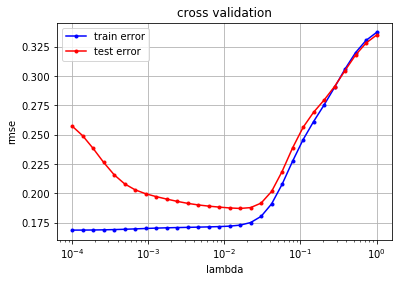

In [32]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 0
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************    
    for lambda_ in lambdas:
        loss_train = 0
        loss_test = 0
        for k in range(0,k_fold):
            loss_tr, loss_te = cross_validation(y,x,k_indices,k,lambda_,degree)
            loss_train = loss_train + loss_tr
            loss_test = loss_test + loss_te
        rmse_tr.append(loss_train/k_fold)
        rmse_te.append(loss_test/k_fold)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

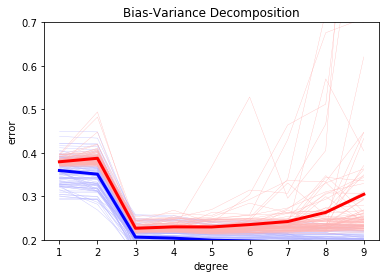

In [34]:
#from least_squares import least_squares
#from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        x_train, y_train, x_test, y_test = lib.split_data(x,y,ratio_train,seed)

        for index_degree, degree in enumerate(degrees):
            phi_tr = lib.build_poly(x_train, degree)
            phi_te = lib.build_poly(x_test, degree)

            mse, w_opt = lib.least_squares(y_train,phi_tr)

            loss_tr = lib.compute_loss(y_train,phi_tr,w_opt)
            loss_te = lib.compute_loss(y_test,phi_te,w_opt)

            loss_tr = np.sqrt(loss_tr)
            loss_te = np.sqrt(loss_te)
            
            rmse_tr[index_seed,index_degree] = loss_tr
            rmse_te[index_seed,index_degree] = loss_te

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()